In [7]:
import sys

sys.path.insert(0, '/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction')

from config import *
from tools import *
from features import *


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def clean_target(target):
    """
    Nettoie le texte de la colonne Target :
    - Supprime 'nbsinister-kmeans-5-Class-Dept-' au début du texte.
    - Remplace 'nbsinister-kmeans-5-Class-Dept' par 'Raw' si c'est exactement cette valeur.
    """
    if target == "nbsinister-kmeans-5-Class-Dept":
        return "Raw"
    return target.replace("nbsinister-kmeans-5-Class-Dept-", "")

def plot_weights_by_target(df):
    """
    Affiche un plot des 'Weights' en fonction de 'Target' avec un subplot différent par valeur unique de 'scale'.
    - Nettoie 'Target' en supprimant le préfixe spécifique.
    - Trie les 'Target' en fonction des poids (Weights) pour un affichage plus clair.
    
    Arguments:
    df -- DataFrame contenant les colonnes 'Weights', 'Target' et 'scale'.
    """
    df = df.copy()  # Éviter le FutureWarning de Pandas
    df["Clean_Target"] = df["Target"].apply(clean_target).copy()  # Nettoyage des Targets
    
    unique_scales = df['scale'].unique()
    num_scales = len(unique_scales)
    
    num_cols = 3
    num_rows = int(np.ceil(num_scales / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 6 * num_rows), sharex=False)

    axes = axes.flatten()  # Aplatir la grille pour éviter les erreurs d'index

    for i, (ax, scale) in enumerate(zip(axes, unique_scales)):
        subset = df[df['scale'] == scale].copy()  # Copie explicite pour éviter FutureWarning
        subset = subset.sort_values(by="Weights", ascending=False)

        sns.barplot(data=subset, x='Clean_Target', y='Weights', ax=ax, hue='Clean_Target', palette="viridis", errorbar=None, legend=False)

        #ax.set_title(f"Scale: {scale}", fontsize=14)
        ax.set_xlabel("Target", fontsize=12)
        ax.set_ylabel("Weights", fontsize=12)
        ax.tick_params(axis='x', rotation=90)

    for j in range(i + 1, len(axes)):  # Supprimer les axes inutilisés si besoin
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [9]:
#path = Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/firemen/firepoint/2x2/train/occurence_voting/check_z-score/full_0_all_4_0_risk-regular_node/baseline/filter_full_one_nbsinister-kmeans-5-Class-Dept_classification_softmax')

#object = read_object(f'filter_full_one_nbsinister-kmeans-5-Class-Dept_classification_softmax.pkl', path)

In [10]:
#object.weights_for_model

In [29]:
def firemen(base):
    firemen_root = Path('firemen') / 'firepoint' / '2x2' / 'train' / 'occurence_voting' / 'check_z-score'
    #firemen_root = Path('bdiff') / 'firepoint' / '2x2' / 'train' / 'occurence_voting' / 'check_z-score'

    prefixs = [f'full_0_all_4_0_{base}_node', f'full_0_all_5_0_{base}_node', f'full_0_all_6_0_{base}_node', f'full_0_all_7_0_{base}_node', f'full_0_all_departement_0_None_node']
    scale = [4,5, 6,7, 'departement']
    model = 'filter_full_one_nbsinister-kmeans-5-Class-Dept_classification_softmax'

    weights = []

    for i, prefix in enumerate(prefixs):
        object = read_object('filter_full_one_nbsinister-kmeans-5-Class-Dept_classification_softmax.pkl', firemen_root / prefix / 'baseline' / model)
        print(firemen_root / prefix / 'baseline' / model)
        weight = object.weights_for_model
        print(weight)
        df = pd.DataFrame(index=np.arange(len(weight)))
        df['Model'] = [model.name for model in object.best_estimator_]    
        df['Weights'] = weight
        df['scale'] = scale[i]
        weights.append(df)
        print(scale[i])

    weights = pd.concat(weights).reset_index(drop=True)
    weights['Target'] = weights['Model'].apply(lambda x : x.split('_')[3])

    weights_total = weights.groupby(['Target'])['Weights'].mean().reset_index()
    weights_total['scale'] = 'all'

    plot_weights_by_target(weights)
    plot_weights_by_target(weights_total)

def bdiff(base):
    #firemen_root = Path('firemen') / 'firepoint' / '2x2' / 'train' / 'occurence_voting'
    firemen_root = Path('bdiff_small') / 'firepoint' / '2x2' / 'train' / 'occurence_voting' / 'check_z-score'

    prefixs = [ f'full_0_all_departement_0_None_node']
    scale = ['departement']
    model = 'filter_full_one_nbsinister-kmeans-5-Class-Dept_classification_softmax'

    weights = []

    for i, prefix in enumerate(prefixs):
        object = read_object('filter_full_one_nbsinister-kmeans-5-Class-Dept_classification_softmax.pkl', firemen_root / prefix / 'baseline' / model)
        weight = object.weights_for_model
        df = pd.DataFrame(index=np.arange(len(weight)))
        df['Model'] = [model.name for model in object.best_estimator_]    
        df['Weights'] = weight
        df['scale'] = scale[i]
        weights.append(df)
        print(scale[i])

    weights = pd.concat(weights).reset_index(drop=True)
    weights['Target'] = weights['Model'].apply(lambda x : x.split('_')[3])
    
    weights_total = weights.groupby(['Target'])['Weights'].mean().reset_index()
    weights_total['scale'] = 'all'
    plot_weights_by_target(weights)
    plot_weights_by_target(weights_total)

#firemen('risk-regular')

#firemen('risk-size-watershed') 

In [12]:
#bdiff('risk-size-watershed')

departement


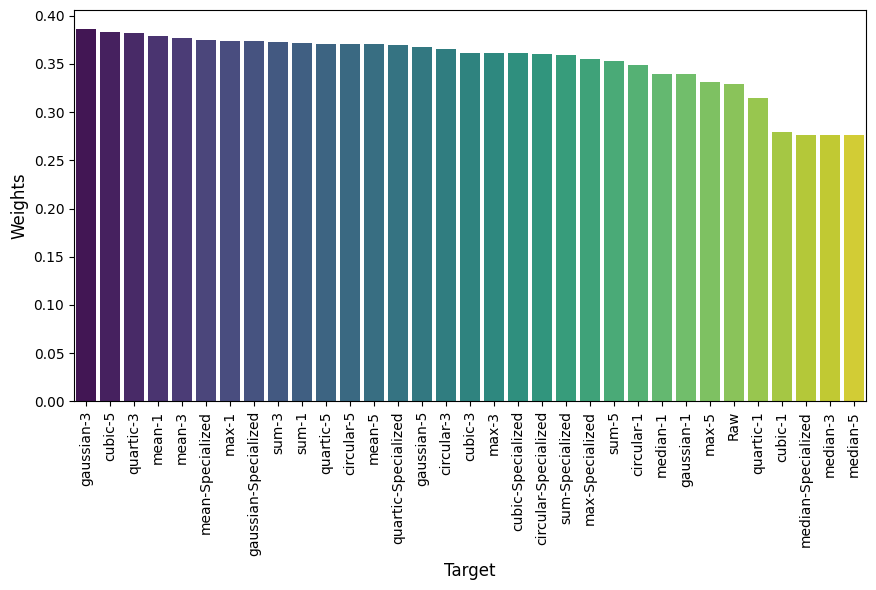

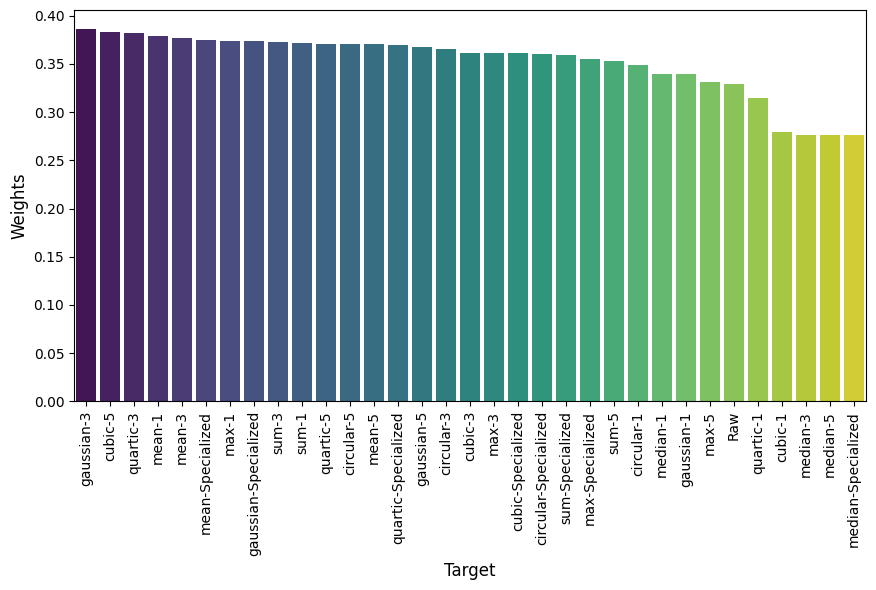

In [30]:
bdiff('risk-regular')